# Kazakh-British Technical University
### Introduction to Machine Learning

## Homework:  Gradient Descent and Method Newton

 Deadline: 03.04.2024 00:00

### Task of Gradient Descent and Newton-Raphson for quadratic functions. Read carefully and first be introduced !!
*This file consist several task to complete. Some codes are already prepared and no need to make changes. Do and write the code only in the indicated points and try to get the expected result. While plotting the chart you may get a bit different graph in term of size and style. The graph is **accepted** if it illustrates the point what is asked. Some part of this work is educational and pay more attention.
This work is estimated for 1 - score
You will be earning the score for each completed part os exercises.*



## Introduction

Gradient descent is an optimization algorithm, i.e. numerical method for finding the local minimum/maximum) of a function. This effect is achieved by moving along the gradient vector (towards the antigradient to search for the minimum, in the opposite direction to search for the maximum). A gradient is, by definition, a vector whose direction indicates the direction of the fastest growth, in our case, of a function.
Gradient descent, as you might guess, given the above, is relevant for a huge number of machine learning problems, starting from classical and going deeper towards deep learning. It makes sense even in its simplest form, but over time a huge number of its variations have been invented, more beneficial for certain tasks.


### A little journey into three-dimensional geometry

#### Theoretical part

##### Try to answer the following questions:
* What equation defines a straight line on a plane? What is the difference between the entries $y = kx + b$ and $ax + by + c = 0$?

* Write down the equation of a plane in three-dimensional space, the equation of a hyperplane in multidimensional space. Using the introduced notation, answer in what dimension of space is the hyperplane from the previous question defined?

* If any of the coefficients in the hyperplane equation are equal to 0, what does this mean geometrically?

* What does it mean that the dummy term is 0?

### Part with pictures: visualization of a function of two variables

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

Below is a function that renders surfaces. Check out its interface.

In [3]:
def plot_3d(fun, a=-1, b=1, c=-1, d=1, trace=None):
    """
    Visualizes the function fun on the square [a, b] x [c, d]
     fun : a function that takes two arguments
          (np.array of the same size) and returning
           np.array of the same size with function values
           at appropriate points
     Additionally, you can draw a polyline of N points,
     lying on the resulting surface
     trace : np.array of size N x 2 - coordinates on the plane,
             denoting points of a polyline
    """
    fig = plt.figure(figsize=(10, 8))

    # Make grid
    x1_ = np.linspace(a, b, 100)
    x2_ = np.linspace(c, d, 100)
    x1, x2 = np.meshgrid(x1_, x2_)
    y = fun(x1, x2)

    # Plot the surface
    ax = fig.add_subplot(1, 1, 1, projection="3d")
    ax.plot_surface(x1, x2, y, alpha=0.6)
    ax.contour(x1, x2, y, zdir="z", offset=y.min(), cmap=cm.coolwarm)

    # Plot 3d line
    if trace is not None:
        y_trace = fun(trace[:, 0], trace[:, 1])
        ax.plot(trace[:, 0], trace[:, 1], y_trace, "o-")
        ax.set_xlim(x1.min(), x1.max())
        ax.set_ylim(x2.min(), x2.max())
        ax.set_zlim(y.min(), y.max())

Let's draw a paraboloid using it:
Create a function y = 3x^2 + 4x^2

**TASK TO COMPLETE**

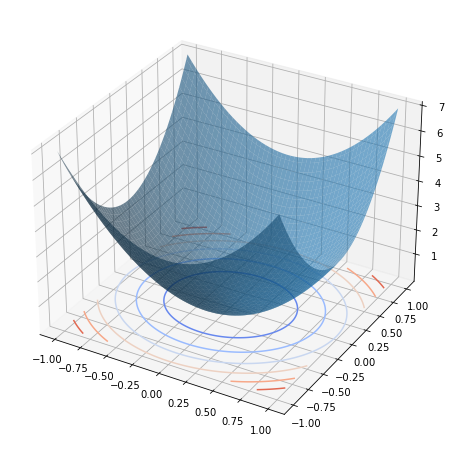

In [4]:
fun = # your code
plot_3d(fun)

SCORE: 0.1

### Expected Result

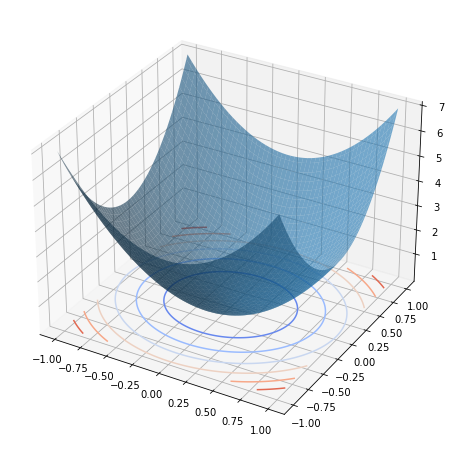

## 2. Let's get to the bottom of things

### Gradient descent, theoretical part

The gradient of the multivariable function $f(x) = f(x_1, \dots, x_d)$ at the point $x_0$ is the vector of its partial derivatives calculated at the point $x_0$.
$$\nabla_x f \bigl | _{x_0} = \biggl(\frac{\partial f}{\partial x_1}, \dots, \frac{\partial f}{\partial x_d} \biggr ) \biggl | _{x_0}$$

Let's look at two simple examples of calculating the gradient in the case of a function of two variables.

#### Task 1
Find the gradient of the quadratic function $f(x) = f(x_1, x_2) = c_1 x_1^2 + c_2 x_2^2$ ($c_1$ and $c_2$ are fixed numbers).

__Solution.__
Let's find the first partial derivative:

$$\frac{\partial f}{\partial x_1} = \frac{\partial (c_1 x_1^2 + c_2 x_2^2)}{\partial x_1} = 2 c_1 x_1.$$

This means that the first component of the gradient is equal to $2 c_1 x_1$. Same with the second component.

Answer:

$$\nabla_x f = (2 c_1 x_1, 2 c_2 x_2)$$

For nonnegative $c_1, c_2$, the minimum of such a quadratic function is reached at 0.
Our next goal is to find this minimum using gradient descent.

__Remember from the lecture:__
* What (optimization) problem does gradient descent solve?
* How does the gradient descent algorithm work?
* How to choose initialization in gradient descent?
* When to stop gradient descent?

### Gradient of a quadratic function

Let's use the code to calculate the quadratic function and generalize it to the case of arbitrary coefficients:

**TASK TO COMPLETE**

In [15]:
def fun(x1, x2, c1=1, c2=1):
    
    return # your code

This function is capable of processing x1 and x2 of any dimension, but we will calculate gradients under the assumption that x1 and x2 are numbers (it’s easier this way)

Now we need to implement the calculation of the gradient of the fun function. Write the code for the function for calculating the gradient at one point as described:

**TASK TO COMPLETE**

In [16]:
def grad_fun(x1, x2, c1=1, c2=1):
    """
    The function takes 2 numbers indicating the point at which the gradient is calculated,
     and returns np.array of size (2,) - the gradient of the quadratic function
     Optional arguments: c1 and c2 - coefficients
    """
    grad = # your code
    return grad


Check the correctness (check with the formula):

In [17]:
grad_fun(x1=0.5, x2=1.5, c1=2, c2=3)

array([2., 9.])

### Gradient descent

Now let's implement gradient descent.
It works like this:
1. First the starting point x is initialized
1. Then the iterations are repeated:
$$x^{(t)} = x^{(t-1)} - \alpha \nabla_{x^{(t-1)}} f$$
Here $\alpha$ is the step length.

Add the function as described:

**TASK TO COMPLETE**

In [20]:
**TASK TO COMPLETE**def grad_descend(grad_fun, step_size=0.1, num_steps=50):
    """
    Implements gradient descent
     Arguments:
     * grad_fun - function that calculates the gradient
     * step_size - step length
     * num_steps - number of iterations

     Returns np.array of size (num_steps+1) x 2,
     The (i+1)th element is a point on the (i+1)th iteration,
     zero element - random initialization
    """
    
    
    # your code
    
    return traj

        

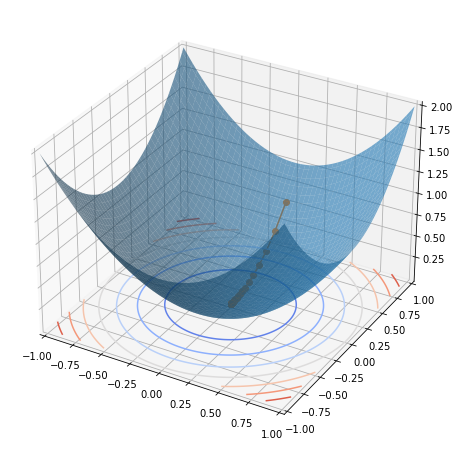

In [21]:
trace = grad_descend(grad_fun, step_size=0.1)
plot_3d(fun, trace=trace)

SCORE: 0.3

Let's test the function (the last element should be close to 0):

Now we are ready to render gradient descent. To do this, we will pass our optimization trajectory as the last argument to the plot_3d function.

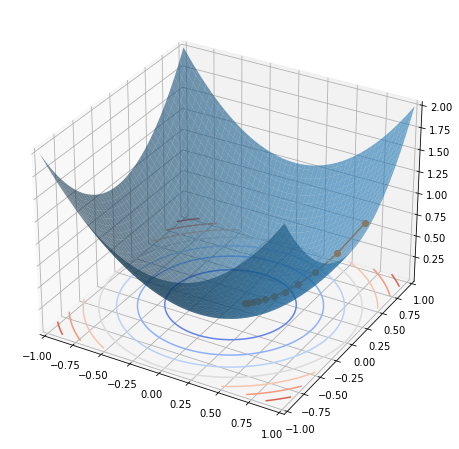

In [22]:
trace = grad_descend(grad_fun, 0.1, 10)
plot_3d(fun, trace=trace)

Run the optimization several times to see how the process behaves under different random initial guesses:

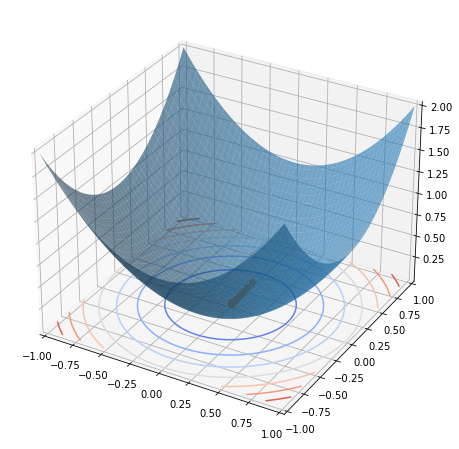

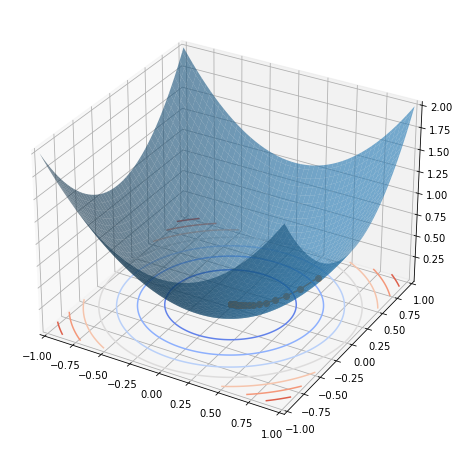

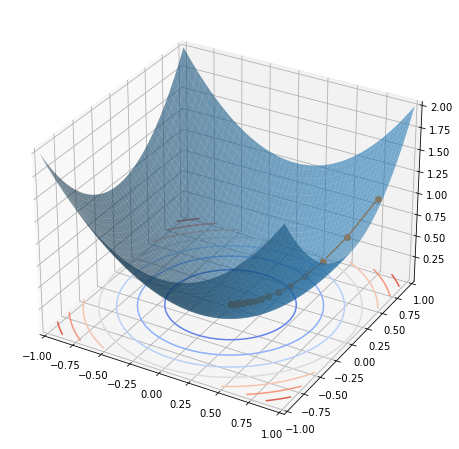

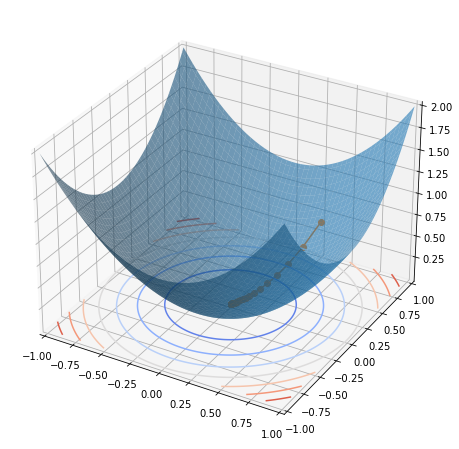

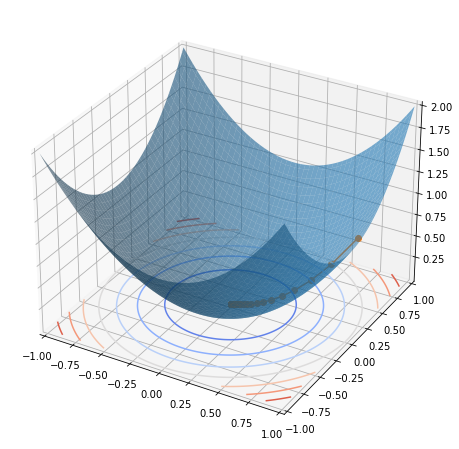

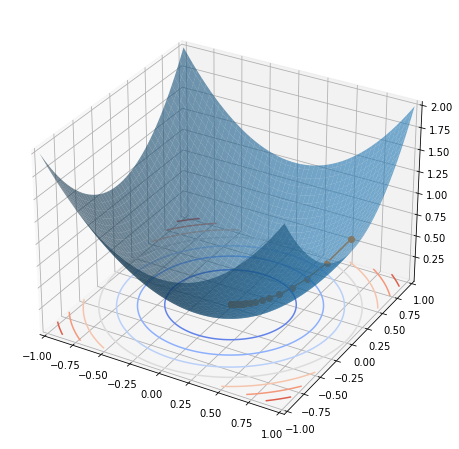

In [23]:
for i in range(6):
    trace = grad_descend(grad_fun, 0.1, 30)
    plot_3d(fun, trace=trace)

Try different step lengths from the set $(0.01, 0.1, 0.5, 1)$.

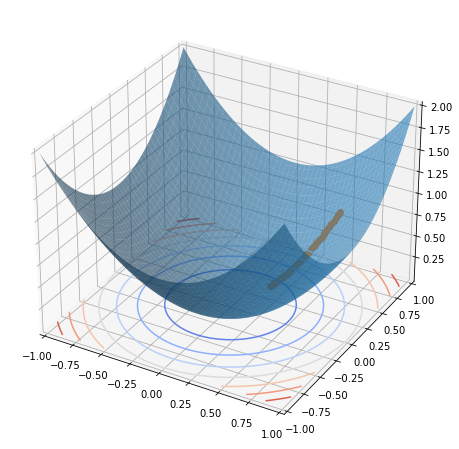

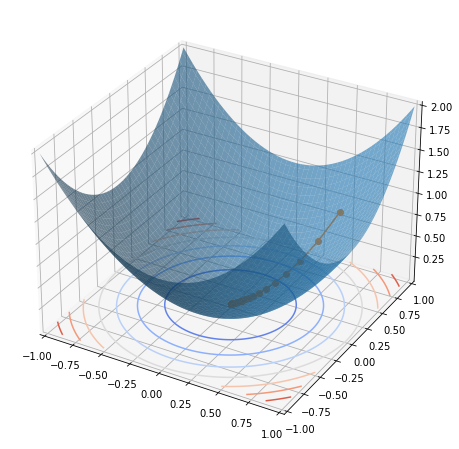

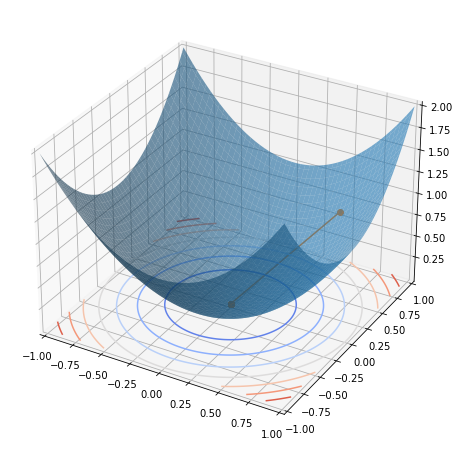

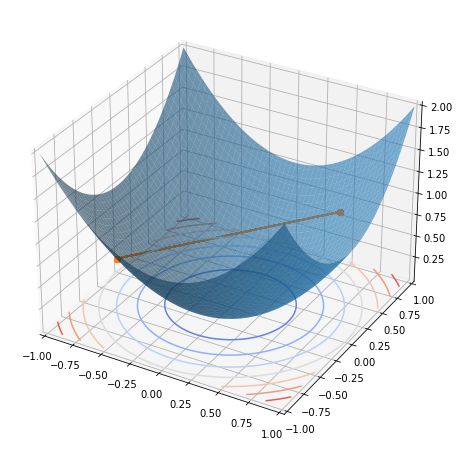

In [24]:
for ss in [0.01, 0.1, 0.5, 1]:
    np.random.seed(0)
    trace = grad_descend(grad_fun, step_size=ss)
    plot_3d(fun, trace=trace)

Explain the last plot, why is it differ from others and what was the cause?

In [25]:
#answer

If the step length is small, the process goes too slowly; if the step length is large, it may disperse.

Finally, let's try using other coefficients.
We optimize the function $f(x) = x_1^2 + 5 x_2^2$, trying the step length (0.1, 0.2, 0.5):

**TASK TO COMPLETE**

In [33]:
def fun(x1, x2, c1, c2):
    
    return # your code

In [34]:
def grad_fun(x1, x2, c1, c2):
    """
    The function takes 2 numbers indicating the point at which the gradient is calculated,
     and returns np.array of size (2,) - the gradient of the quadratic function
     Optional arguments: c1 and c2 - coefficients
    """
    return # your code


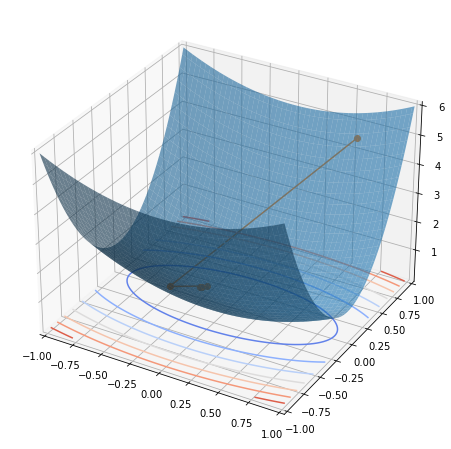

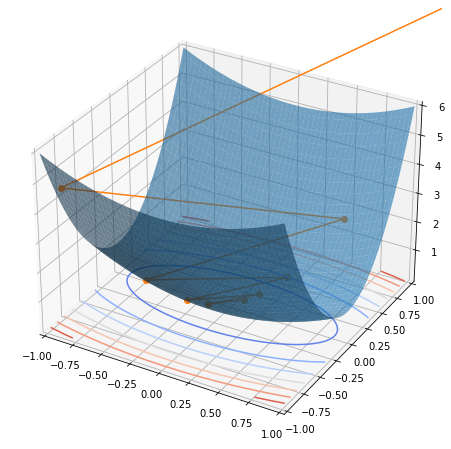

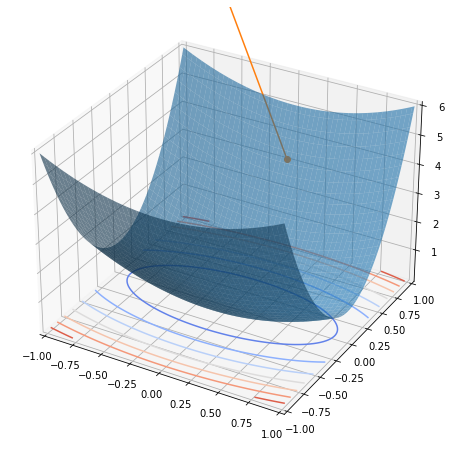

In [35]:
fun_c = # your code
grad_fun_c = # your code

for ss in [0.1, 0.2, 0.5]:
    trace = grad_descend(grad_fun_c, step_size=ss)
    plot_3d(fun_c, trace=trace)

SCORE: 0.1

### EXPECTED RESULTS

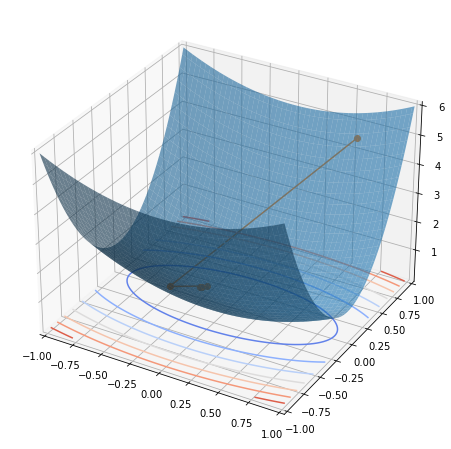

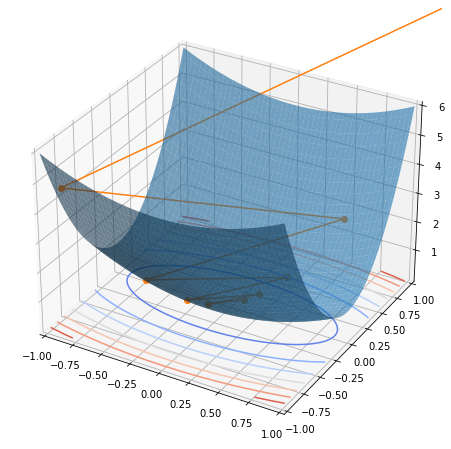

An elongated function is more difficult to optimize. This is why it is recommended to normalize the data before training the model to avoid such fluctuations during optimization.

### Gradient descent for estimating linear regression parameters
Using a simple example, we will analyze the main subtleties associated with stochastic optimization.

Let's generate a matrix of object-features $X$ and a vector of weights $w_{true}$, the vector of target variables $y$ will be calculated as:

$$
y = Xw_{true} + \epsilon,
$$
where $\epsilon \sim N(0, 1)$ (normal noise).

In [5]:
np.random.seed(25)

In [11]:
n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
Y = # your code
w_0 = np.random.uniform(-2, 2, (n_features))

If we try to minimize MSE by hand, then the optimal set of parameters will look like this: $w = (X^TX)^{-1}X^Ty$. This formula contains inversion of the matrix $X^TX$ - a very labor-intensive operation with a large number of features. The complexity of calculations in this case is equal to $O(d^3 + d^2 \ell)$, where $l$ is the number of objects, $d$ is the number of features. When solving problems, such labor intensity often turns out to be prohibitive, so parameters are sought using iterative methods, which cost less. One of them is gradient descent.

Recall that in gradient descent, the parameter values at the next step are obtained from the parameter values at the current step by shifting the functional $Q(w)$ towards the antigradient:

$$w^{(t+1)} = w^{(t)} - \eta_t \nabla Q(w^{(t)}),$$
where $\eta_t$ is the step length of gradient descent.

Also remember that the MSE functional in matrix form can be written as follows:
$$
Q(w) = (y - Xw)^T(y-Xw)
$$
And the corresponding gradient:
$$
\nabla_w Q(w) = \nabla_w[y^Ty - y^TXw - w^TX^Ty + w^TX^TXw] = 0 - X^Ty - X^Ty + (X^TX + X^TX) w = 2X^T(Xw-y)
$$
 

The complexity of calculations when finding parameters in this case is $O(d \ell)$.

Let's train linear regression for MSE using the obtained data using full gradient descent.
As a result, we obtain a vector of parameter estimates

In [13]:
w = w_0.copy()
w_list = [w.copy()]
step_size = 1e-2

for i in range(num_steps):
    w -= 2 * step_size * np.dot(X.T, np.dot(X, w) - Y) / Y.shape[0]
    w_list.append(w.copy())
w_list = np.array(w_list)

### Visualization of GD trajectories

Let us show the sequence of parameter estimates $w^{(t)}$ obtained during iterations. The red dot is $w_{true}$.

To do this, we will write a function that we will continue to use to visualize the optimization process.

In [8]:
def plot_gradient(w_list, title):
    A, B = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))

    plt.figure(figsize=(15, 6))
    plt.title(title)
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim((w_list[:, 0].min() - 0.2, w_list[:, 0].max() + 0.2))
    plt.ylim((w_list[:, 1].min() - 0.2, w_list[:, 1].max() + 0.2))
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_true[0], w_true[1], c="r")
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

<ipython-input-8-f3f98c68abb0>:22: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend="both")


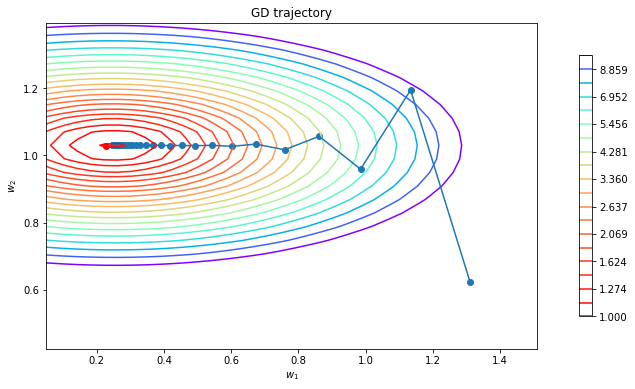

In [9]:
plot_gradient(w_list, "GD trajectory")

### Expected result

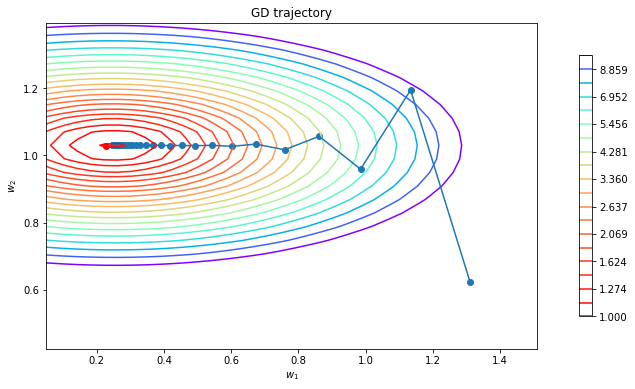

## 3. Moving on

### Stochastic gradient descent
There are various modifications of gradient descent.
We will get acquainted with one of them - stochastic gradient descent.
It differs from the option above by replacing the gradient with an unbiased estimate of the gradient for one or more objects. In this case, the complexity becomes $O(kd)$, where $k$ is the number of objects over which the gradient is estimated, $k \ll \ell$. For large data sets, stochastic gradient descent can provide a significant speed advantage over standard gradient descent.

#### Apply

Let's now modify the code and calculate the gradient not over the entire data set, but only over a random subsample of objects. We obtain the trajectories of stochastic gradient descent.

We will formulate the sample generation and gradient calculation as a function.

In [44]:
def calc_grad_on_batch(X, Y, w, batch_size):
    sample = np.random.randint(n_objects, size=batch_size)
    return 2 * np.dot(X[sample].T, np.dot(X[sample], w) - Y[sample]) / batch_size

In [45]:
step_size = 1e-2

w = w_0.copy()
w_list = [w.copy()]

for i in range(num_steps):
    w -= step_size * calc_grad_on_batch(X, Y, w, batch_size)
    w_list.append(w.copy())

w_list = np.array(w_list)

### Visualization of SGD trajectories

<ipython-input-41-f3f98c68abb0>:22: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend="both")


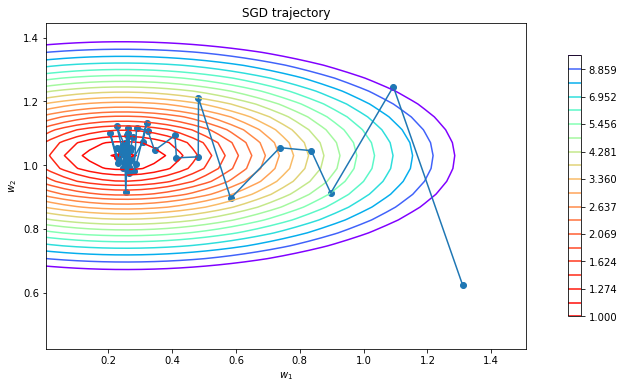

In [46]:
plot_gradient(w_list, "SGD trajectory")

As you can see, the stochastic gradient method “wanders” around the optimum. This behavior can be influenced by selecting the gradient descent step $\eta_t$.

### Let's experiment with gradient descent even more!

Let's try to reduce the gradient descent step at each iteration.

In [47]:
step_size_0 = 0.01

w = w_0.copy()
w_list = [w.copy()]


for i in range(num_steps):
    step_size = step_size_0 / (i + 1)
    w -= step_size * calc_grad_on_batch(X, Y, w, batch_size)
    w_list.append(w.copy())

w_list = np.array(w_list)

<ipython-input-41-f3f98c68abb0>:22: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend="both")


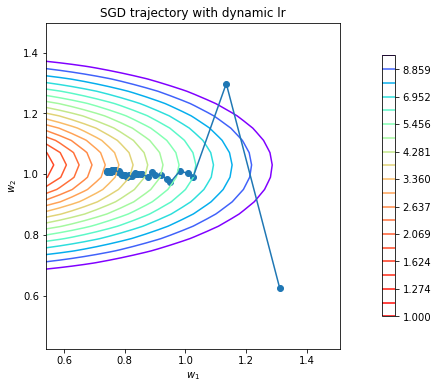

In [48]:
plot_gradient(w_list, "SGD trajectory with dynamic lr")

Now gradient descent moves more directionally, but does not reach the optimum. Let's try a more complex scheme for changing step length:
$$
     \eta_t
     =
     \lambda
     \left(
         \frac{s_0}{s_0 + t}
     \right)^p.
$$
Let's take $s_0 = 1$ and experiment with different $\lambda$ and $p$.

**TASK TO COMPLETE**

In [49]:

def sgd_with_lr_schedule(lambda_param, p=0.5, s_init=1.0, batch_size=10):
    w = w_0.copy()
    w_list = [w.copy()]

    for i in range(num_steps):
        step_size = # your code
        w -= #your code
        

    return np.array(w_list)

<ipython-input-41-f3f98c68abb0>:22: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend="both")


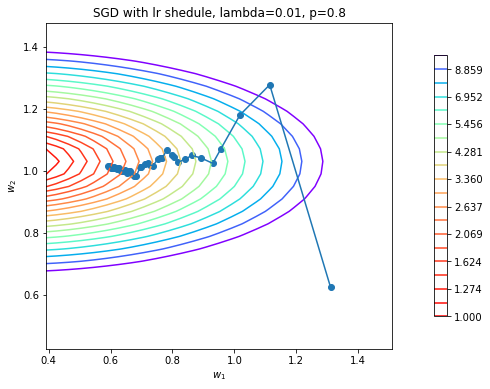

In [50]:
w_list = sgd_with_lr_schedule(lambda_param=0.01, p=0.8)
plot_gradient(w_list, f"SGD with lr shedule, lambda={0.01}, p={0.8}")

### Expected Result

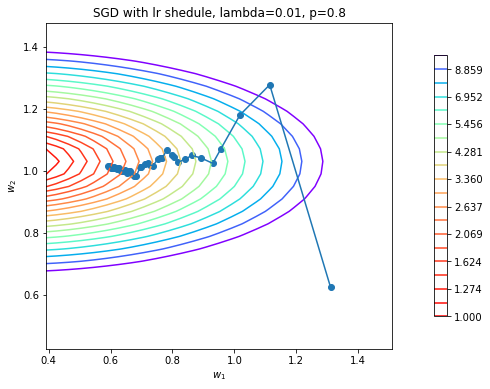

<ipython-input-41-f3f98c68abb0>:22: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend="both")


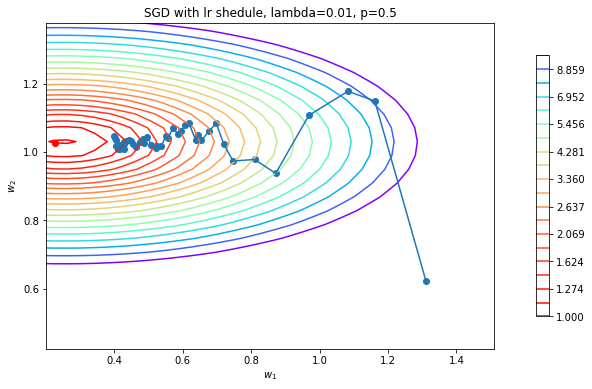

In [51]:
w_list = sgd_with_lr_schedule(lambda_param=0.01, p=0.5)
plot_gradient(w_list, f"SGD with lr shedule, lambda={0.01}, p={0.5}")

<ipython-input-41-f3f98c68abb0>:22: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend="both")


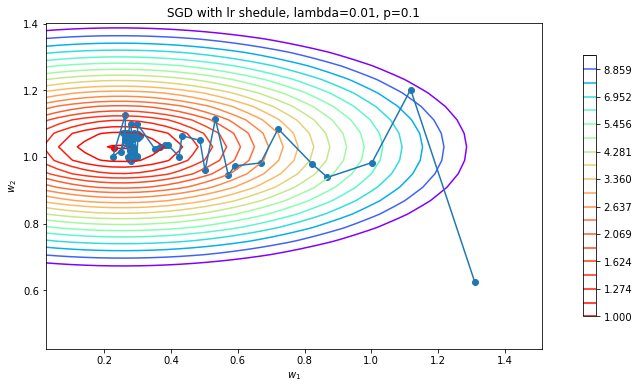

In [52]:
w_list = sgd_with_lr_schedule(lambda_param=0.01, p=0.1)
plot_gradient(w_list, f"SGD with lr shedule, lambda={0.01}, p={0.1}")

The coefficients in the formula for step length are hyperparameters and need to be selected. It is advisable to use a validation sample for this.

Now let's see how the size of the subsample from which the gradient is estimated affects convergence.

<ipython-input-41-f3f98c68abb0>:22: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend="both")


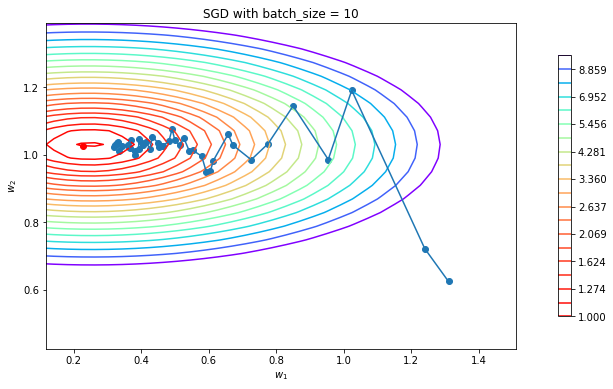

In [53]:
w_list = sgd_with_lr_schedule(lambda_param=0.01, p=0.35, batch_size=10)
plot_gradient(w_list, f"SGD with batch_size = {10}")

<ipython-input-41-f3f98c68abb0>:22: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend="both")


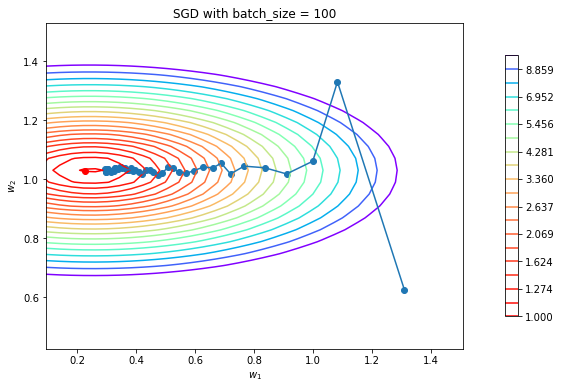

In [54]:
w_list = sgd_with_lr_schedule(lambda_param=0.01, p=0.35, batch_size=100)
plot_gradient(w_list, f"SGD with batch_size = {100}")

The conclusion, in general, is obvious: the larger the subsample size, the more stable the gradient descent trajectory.

### Comparison of convergence speeds

Now let's see how quickly the full and stochastic gradient descent methods reach their optimum. Let's generate a sample and build two graphs:
  - dependence of the loss value on the gradient descent iteration number;
  - dependence of the norm of the gradient of the loss function on the iteration number of gradient descent.


  The norm of the gradient of the loss function is calculated by the formula:

  $$
||\nabla Q(w)|| = ||2𝑋^𝑇(𝑋𝑤−𝑦)||
  $$

In [55]:
# снова нарандомим данные
n_features = 50
n_objects = 1000
num_steps = 200
batch_size = 10

w_true = np.random.uniform(-2, 2, n_features)

X = np.random.uniform(-10, 10, (n_objects, n_features))
Y = X.dot(w_true) + np.random.normal(0, 5, n_objects)

In [56]:
from scipy.linalg import norm

step_size_sgd = 1e-2
step_size_gd = 1e-2
w_sgd = np.random.uniform(-4, 4, n_features)
w_gd = w_sgd.copy()
residuals_sgd = [np.mean(np.power(np.dot(X, w_sgd) - Y, 2))]
residuals_gd = [np.mean(np.power(np.dot(X, w_gd) - Y, 2))]

norm_sgd = []
norm_gd = []


for i in range(num_steps):
    step_size = step_size_sgd / ((i + 1) ** 0.51)
    sample = np.random.randint(n_objects, size=batch_size)

    w_sgd -= (
        2
        * step_size
        * np.dot(X[sample].T, np.dot(X[sample], w_sgd) - Y[sample])
        / batch_size
    )
    residuals_sgd.append(np.mean(np.power(np.dot(X, w_sgd) - Y, 2)))
    norm_sgd.append(norm(np.dot(X[sample].T, np.dot(X[sample], w_sgd) - Y[sample])))

    w_gd -= 2 * step_size_gd * np.dot(X.T, np.dot(X, w_gd) - Y) / Y.shape[0]
    residuals_gd.append(np.mean(np.power(np.dot(X, w_gd) - Y, 2)))
    norm_gd.append(norm(np.dot(X.T, np.dot(X, w_gd) - Y)))

Make a visualisation of the loss function depending on number of iteration

**TASK TO COMPLETE**

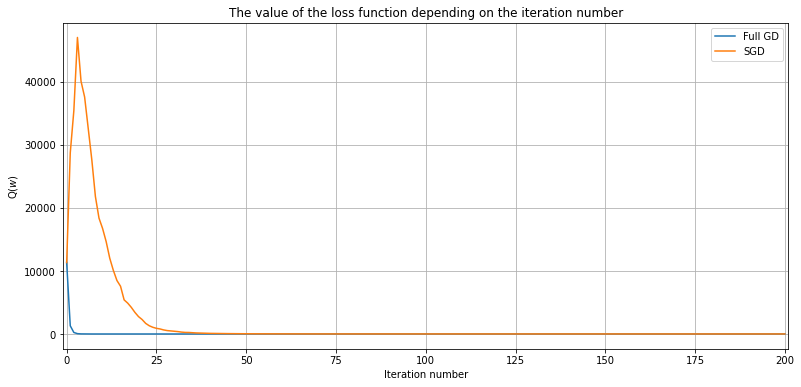

In [57]:
# your code

SCORE: 0.1

### Expected Results

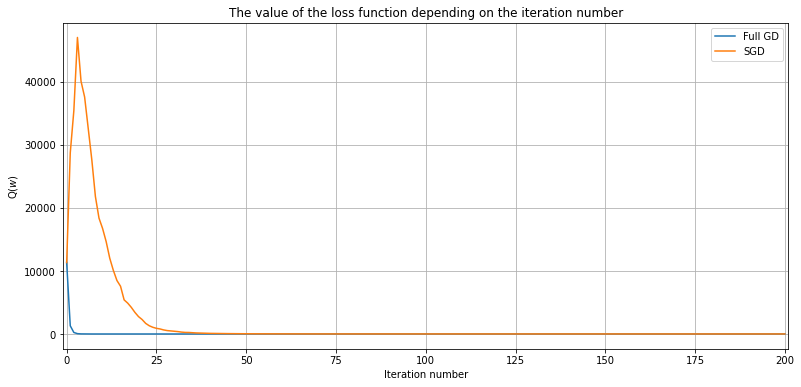

 As you can see, GD turns out to be close to the optimum in just a few iterations, while the behavior of SGD can be very unstable. The unstable behavior of the stochastic modification at the initial iterations is clearly visible in the graph with the gradient norm. As a rule, even larger fluctuations are observed for more complex models. By selecting the step size, a better convergence speed can be achieved, and there are methods that adaptively select the step size (for example, AdaGrad, Adam, RMSProp).

## Task 2 Newton Method for quadrati functions

In numerical analysis, the Newton's Method (or Method of Newton-Raphson), developed by Isaac Newton and Joseph Raphson, aims at estimating the roots of a function. For this purpose, an initial approximation is chosen, after this, the equation of the tangent line of the function at this point and the intersection of it with the axis of the abscissa, in order to find a better approximation for the root, is calculated. By repeating the process, an iterative method is created to find the root of the function.

In mathematical notation the method is described in the following formula:

Visualize the function y(x). X values should vary from -5 to 5 with an interval 100

$$
y(x) = x^2 + 5 * x^2
$$`

**TASK TO COMPLETE**

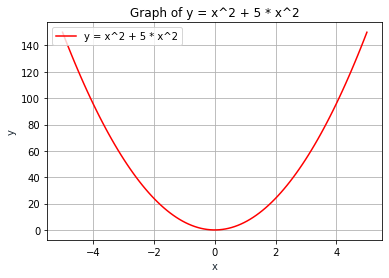

In [15]:
# your code

SCORE: 0.1

### Expected result

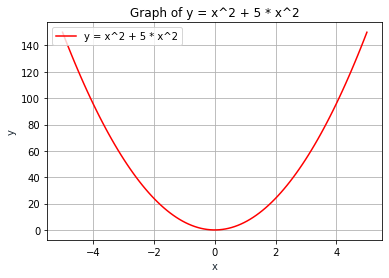

In [94]:
from sympy import diff, ln
from sympy.abc import x

f = x**2 + 5 * x**2
df = diff(f)
df

# 2 - 1/x

12*x

In [95]:
ddf = diff(df)
ddf

# x**(-2)

12

Let's start iterating from x0 ​= 0.1:

In [100]:
x0 = 0.1
fx0 = x0**2 + 5 * x0**2
fx0
# 2.50258509299405

0.06000000000000001

Looks boring. Lets create a loop and print result:

**TASK TO COMPLETE**

In [98]:
**TASK TO COMPLETE**
import pandas as pd

# Define number of iterations
# -->  your code

# Define start point x0
# -->  your code


# Define lists of x and f(x)
# -->  your code


# Add first x and f(x)
# -->  your code


# Start iterations
for _ in range(max_iter):
    # Calculate the next step (x)
    # -->  your code
    
    # Calculate next f(x)
    # -->  your code
    
    # Store results
    # -->  your code
    
    
    # Prepare next iteration
    # -->  your code
    
    
# Prepare dataframe to show
df = pd.DataFrame({'x': x_list, 'f(x)': fx_list})
# Show result
print(df)

     x    f(x)
0  0.1    0.06
1 -0.9    4.86
2 -1.9   21.66
3 -2.9   50.46
4 -3.9   91.26
5 -4.9  144.06


Lets plot how it looks:

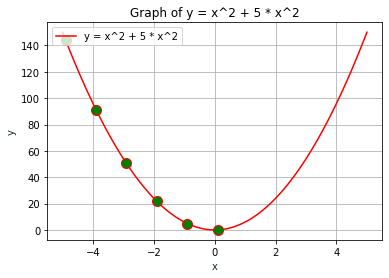

In [102]:
x = np.linspace(-5, 5, 100)
y =x**2 + 5 * x**2

plt.plot(x, y, '-r', label='y = x^2 + 5 * x^2')

plt.title('Graph of y = x^2 + 5 * x^2')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()

for x, fx in zip(x_list, fx_list):
    plt.plot(x, fx, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="green")

plt.show()

SCORE: 0.3

### Expected result
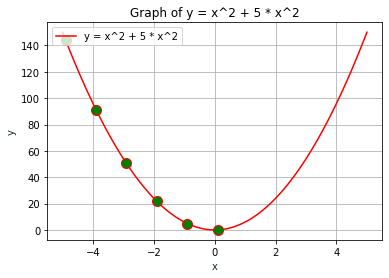